Found 12000 files belonging to 8 classes.
Using 9600 files for training.
Found 4000 files belonging to 8 classes.
Using 800 files for validation.


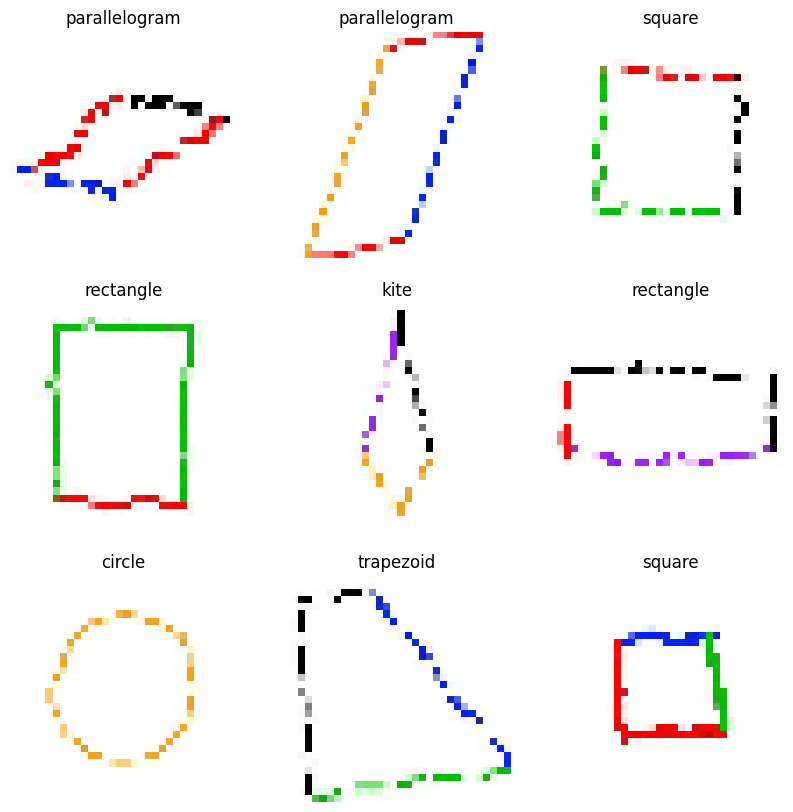

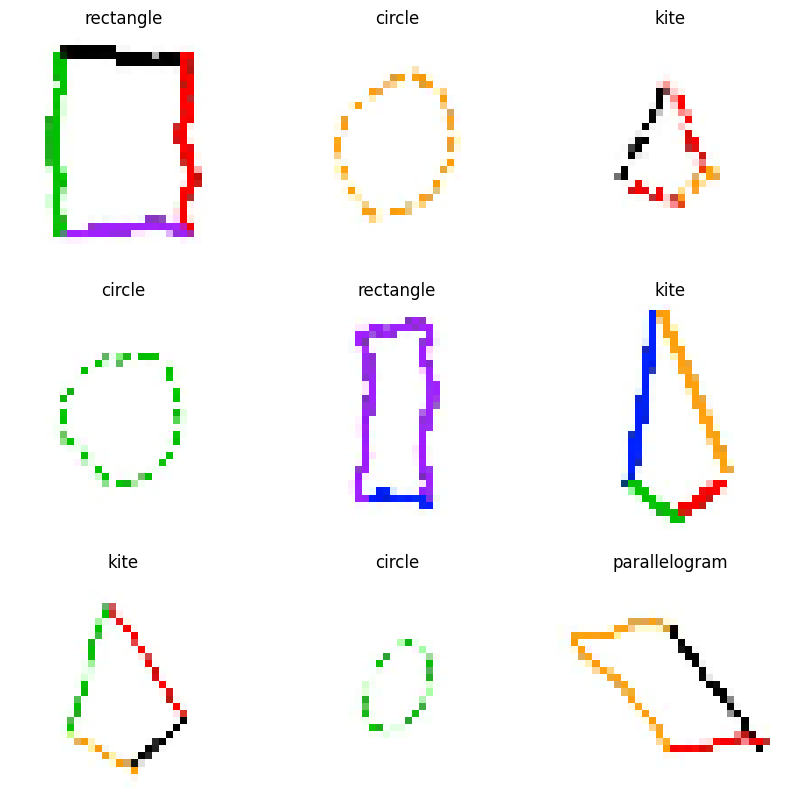

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt
import tensorflow as tf
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/geometric-shapes-mathematics/dataset/train', 
    labels='inferred',
    label_mode='int',  
    batch_size=32,  
    image_size=(32, 32),  
    seed=123,  
    validation_split=0.2,  
    subset='training'  
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/geometric-shapes-mathematics/dataset/test', 
    labels='inferred',
    label_mode='int',  
    batch_size=32,  
    image_size=(32, 32),  
    seed=123,  
    validation_split=0.2,  
    subset='validation'
)
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
for images, labels in test_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [53]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32,32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [54]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [55]:
history = model.fit(train_dataset, epochs=10, 
                    validation_data=test_dataset)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.2271 - loss: 4.8734 - val_accuracy: 0.5362 - val_loss: 1.2616
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6150 - loss: 1.0695 - val_accuracy: 0.7412 - val_loss: 0.7467
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8030 - loss: 0.5718 - val_accuracy: 0.8000 - val_loss: 0.5846
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8698 - loss: 0.3738 - val_accuracy: 0.8200 - val_loss: 0.4835
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9048 - loss: 0.2702 - val_accuracy: 0.8838 - val_loss: 0.3513
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9282 - loss: 0.2070 - val_accuracy: 0.9212 - val_loss: 0.2743
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9489 - loss: 0.1456 - val_accuracy: 0.9062 - val_loss: 0.2731
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9490 - loss: 0.1501 - va

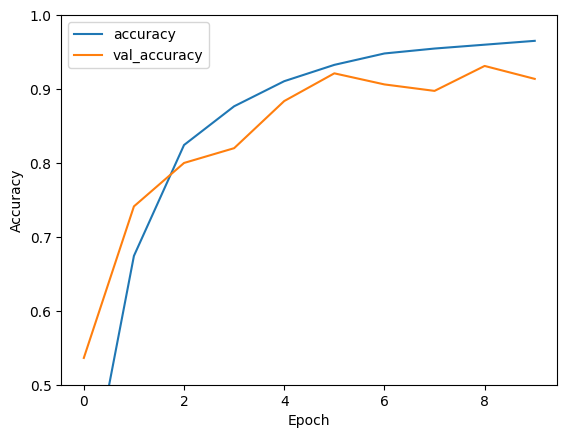

In [56]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()

In [64]:
print("Accuracy:", max(history.history['accuracy']))
print("Validation Accuracy:", max(history.history['val_accuracy']))
print("Loss:", max(history.history['loss']))

Accuracy: 0.9652083516120911
Validation Accuracy: 0.9312499761581421
Loss: 2.3805091381073


In [60]:
model.predict(test_dataset)
y_predicted=model.predict(test_dataset)
print(y_predicted[1])
print(np.argmax(y_predicted[1]))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[2.0605810e-07 4.6628085e-03 1.2715895e-03 8.5239959e-01 3.9248440e-09
 3.3486394e-05 6.9063652e-05 1.4156315e-01 1.1615719e-13 4.6600779e-12]
3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


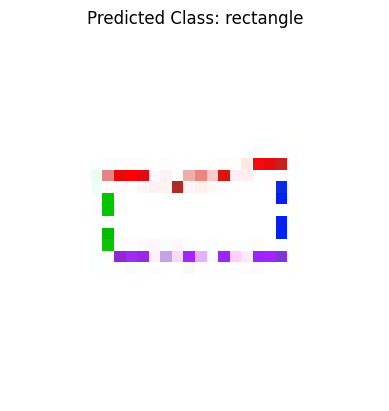

In [79]:
image_path = "/kaggle/input/geometric-shapes-mathematics/dataset/test/rectangle/rectangle-2001.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
class_name = os.path.basename(os.path.dirname(image_path))
resized_image = cv2.resize(image, (32, 32))
normalized_image = resized_image / 255.0
prediction = model.predict(np.expand_dims(normalized_image, axis=0))
predicted_class_name = class_name
plt.imshow(resized_image)
plt.title("Predicted Class: " + predicted_class_name)
plt.axis("off")
plt.show()
